This is a data preprocessor for Immigration Enforcement Data Tables from https://www.dhs.gov/immigration-statistics/enforcement-actions

In [1]:
# General Utility# Gener 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
from IPython.display import display
from IPython.display import Image
%matplotlib inline

## All Tables
* **Table 33:** Aliens apprehended: total (**DONE**)
* **Table 34d:** Aliens apprehended by region and country of nationality
* **Table 35:** Aliens Apprehended by program and border patrol sector, Investigations special agent in charge (SAC) jurisdiction, and area of responsibility
* **Table 36:** Aliens determined inadmissable (**DONE**)
* **Table 37:** Aliens determined inadmissable by region and country of nationality 
* **Table 38:** Aliens determined inadmissable by field office (**DONE**)
* **Table 39:** Aliens Removed or Returned (**DONE**)
* **Table 40d:** Aliens returned by region and country of nationality
* **Table 41d:** Aliens removed by criminal status and region and country of nationality


#### **Table 39**
* **footnote 1**:  1 Removals are the compulsory and confirmed movement of an inadmissible or deportable alien out of the United States based on an order of removal. An alien who is removed has administrative or criminal consequences placed on subsequent reentry owing to the fact of the removal.
* **footnote 2:**  2 Returns are the confirmed movement of an inadmissible or deportable alien out of the United States not based on an order of removal. 
* **footnote 3:**  3 Includes the 15 months from July 1, 1975 to September 30, 1976 because the end date of fiscal years was changed from June 30 to September 30.
* **footnote 4:**  4 The counting methodology for administrative arrests by ICE ERO was revised to align with ICE ERO reporting for 2016; for earlier years, only one administrative arrests could be counted for the same person on the same day.

In [208]:
df_33 = pd.read_excel('fy2016_table33.xls', header=3)
df_33.iloc[40:]

,Year,Number,Year.1,Number.1
40,1965,110371.0,2011,678606.0
41,1966,138520.0,2012,671327.0
42,1967,161608.0,2013,662483.0
43,1968,212057.0,2014,679996.0
44,1969,283557.0,2015,462388.0
45,1970,345353.0,2016 4,530250.0
46,"1 Includes the 15 months from July 1, 1975 to ...",NaN,NaN,NaN
47,"2 Beginning in 2008, includes all administrati...",NaN,NaN,NaN
48,"3 Beginning in 2009, data include administrati...",NaN,NaN,NaN
49,3 The counting methodology for administrative ...,NaN,NaN,NaN


The rows at the bottom (46 on) are notes in the excel file, and I don't want them. I could simply drop rows 46+, but if I use this script again with future data releases, I'd have to change that number and that limits reuse. Instead, I'll drop rows with NaN values.   

In [209]:
df_33.dropna(inplace=True)
df_33.iloc[35:]

,Year,Number,Year.1,Number.1
35,1960,70684.0,2006,1206408.0
36,1961,88823.0,2007,960673.0
37,1962,92758.0,2008 2,1043759.0
38,1963,88712.0,2009 3,889212.0
39,1964,86597.0,2010,796587.0
40,1965,110371.0,2011,678606.0
41,1966,138520.0,2012,671327.0
42,1967,161608.0,2013,662483.0
43,1968,212057.0,2014,679996.0
44,1969,283557.0,2015,462388.0


Looking at the values for column Year.1, we see that some years have an extra number. In the Excel file, these are superscripts. We don't want to include those either. I'll start by looking at the types of the columns.

In [210]:
df_33.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 4 columns):
Year        46 non-null object
Number      46 non-null float64
Year.1      46 non-null object
Number.1    46 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


In [211]:
df_33.head(6)

,Year,Number,Year.1,Number.1
0,1925,22199.0,1971,420126.0
1,1926,12735.0,1972,505949.0
2,1927,16393.0,1973,655968.0
3,1928,23566.0,1974,788145.0
4,1929,32711.0,1975,766600.0
5,1930,20880.0,1976 1,1097739.0


In [212]:
print('For the value in row {}, column Year.1 of df_33, the type = {}'.format(2,type(df_33['Year.1'][2])))
print('For the value in row {}, column Year.1 of df_33, the type = {}'.format(5,type(df_33['Year.1'][5])))

For the value in row 2, column Year.1 of df_33, the type = <class 'int'>
For the value in row 5, column Year.1 of df_33, the type = <class 'str'>


Ok, so some of these values are ints, but the ones we need to clean up are Strings. I'll check both columns 'Year' and 'Year.1'. 

In [213]:
display(df_33[[type(x) == str for x in df_33['Year']]])
display(df_33[[type(x) == str for x in df_33['Year.1']]])

,Year,Number,Year.1,Number.1


,Year,Number,Year.1,Number.1
5,1930,20880.0,1976 1,1097739.0
37,1962,92758.0,2008 2,1043759.0
38,1963,88712.0,2009 3,889212.0
45,1970,345353.0,2016 4,530250.0


In [214]:
tmp = df_33[[type(x) == str for x in df_33['Year.1']]]
df_33.loc[[type(x) == str for x in df_33['Year.1']],['Year.1']] = [int(x.split()[0]) for x in tmp['Year.1']]

In [215]:
print('For the value in row {}, column Year.1 of df_33, the type = {}'.format(2,type(df_33['Year.1'][2])))
print('For the value in row {}, column Year.1 of df_33, the type = {}'.format(5,type(df_33['Year.1'][5])))

For the value in row 2, column Year.1 of df_33, the type = <class 'numpy.int64'>
For the value in row 5, column Year.1 of df_33, the type = <class 'numpy.int64'>


In [216]:
display(df_33[[type(x) == str for x in df_33['Year.1']]])

,Year,Number,Year.1,Number.1


Now we see that there aren't any String values in column 'Year.1' and the values we checked before are no longer int and str, rather they're numpy.int64 now. Pandas automatically coerced them to a smaller and faster type when the added complexity was no longer needed.

In [217]:
# df_33['Year.1'][type(x) == str for x in df_33['Year.1']]
df_33[[type(x) == str for x in df_33['Year.1']]]

,Year,Number,Year.1,Number.1


In [218]:
df_33.head(2)

,Year,Number,Year.1,Number.1
0,1925,22199.0,1971,420126.0
1,1926,12735.0,1972,505949.0


Now I want to combine these year and number columns. To do this, I'll take the '_.1' columns, rename their columns (to match the other columns) and append() them together.

In [219]:
tmp = df_33.loc[:,['Year.1', 'Number.1']]
tmp.columns = ['Year', 'Number']
df_33 = df_33.loc[:,['Year', 'Number']].append(tmp, ignore_index=True)

In [220]:
df_33.shape

(92, 2)

Now I want to set the index to be the Year.

In [221]:
df_33.set_index('Year', inplace=True)

In [222]:
df_33.head(5)

,Number
Year,
1925,22199.0
1926,12735.0
1927,16393.0
1928,23566.0
1929,32711.0


We're nearly done preprocessing this single table (of 9, the government isn't trying to make this easy), but as we're going to merge this with probably (at least) 8 other columns, I want to change 'Number' to something more meaningful.

In [223]:
df_33.rename(columns={'Number':'aliens_apprehended'}, inplace=True)

In [224]:
df_33.head(5)

,aliens_apprehended
Year,
1925,22199.0
1926,12735.0
1927,16393.0
1928,23566.0
1929,32711.0


In [225]:
cols = pd.MultiIndex.from_arrays([list(df_33.columns.values), ['Total']], names=['category', ''])
cols

MultiIndex(levels=[['aliens_apprehended'], ['Total']],
           labels=[[0], [0]],
           names=['category', ''])

In [226]:
df_33.columns = cols
df_33.head()

category,aliens_apprehended
,Total
Year,
1925,22199.0
1926,12735.0
1927,16393.0
1928,23566.0
1929,32711.0


In [227]:
df_36 = pd.read_excel('fy2016_table36.xls', header=3)
df_36.dropna(inplace=True)
df_36.rename(columns={'Number':'aliens_inadmissable'}, inplace=True)
df_36.set_index('Year', inplace=True)
df_36.columns = pd.MultiIndex.from_arrays([list(df_36.columns.values), ['Total']], names=['category', ''])
df_36

category,aliens_inadmissable
,Total
Year,
2005,251202.0
2006,207631.0
2007,202030.0
2008,222798.0
2009,223908.0
2010,229575.0
2011,213345.0
2012,195804.0


In [228]:
df_full.head(5)

category aliens_apprehended inadmissible_by_Field_Office              \
location              Total                        Total Atlanta, GA   
Year                                                                   
1925                22199.0                          NaN         NaN   
1926                12735.0                          NaN         NaN   
1927                16393.0                          NaN         NaN   
1928                23566.0                          NaN         NaN   
1929                32711.0                          NaN         NaN   

category                                                               \
location Baltimore, MD Boston, MA Buffalo, NY Chicago, IL Detroit, MI   
Year                                                                    
1925               NaN        NaN         NaN         NaN         NaN   
1926               NaN        NaN         NaN         NaN         NaN   
1927               NaN        NaN         NaN         NaN         NaN   
1928               NaN        NaN         NaN         NaN         NaN   
1929               NaN        NaN         NaN         NaN         NaN   

category                                 ...                       \
location El Paso, TX Houston, TX         ...         Portland, OR   
Year                                     ...                        
1925             NaN         NaN         ...                  NaN   
1926             NaN         NaN         ...                  NaN   
1927             NaN         NaN         ...                  NaN   
1928             NaN         NaN         ...                  NaN   
1929             NaN         NaN         ...                  NaN   

category                                                              \
location Pre-clearance1 San Diego, CA San Francisco, CA San Juan, PR   
Year                                                                   
1925                NaN           NaN               NaN          NaN   
1926                NaN           NaN               NaN          NaN   
1927                NaN           NaN               NaN          NaN   
1928                NaN           NaN               NaN          NaN   
1929                NaN           NaN               NaN          NaN   

category                                                 aliens_inadmissable  
location Seattle, WA Tampa, FL Tucson, AZ Unknown office               total  
Year                                                                          
1925             NaN       NaN        NaN            NaN                 NaN  
1926             NaN       NaN        NaN            NaN                 NaN  
1927             NaN       NaN        NaN            NaN                 NaN  
1928             NaN       NaN        NaN            NaN                 NaN  
1929             NaN       NaN        NaN            NaN                 NaN  

[5 rows x 25 columns]

In [229]:
df_38 = pd.read_excel('fy2016_table38.xls', header=3)
df_38.dropna(inplace=True)
# df_38.rename(columns={'Number':'aliens_inadmissable'}, inplace=True)
# df_38.set_index('Year', inplace=True)
df_38

,Field office,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total,202030.0,222798.0,223908.0,229575.0,213345.0,195804.0,205623.0,225016.0,254714.0,274617.0
1,"Atlanta, GA",3906.0,7529.0,8004.0,9166.0,8808.0,8054.0,8406.0,10491.0,8168.0,6714.0
2,"Baltimore, MD",2006.0,2232.0,2429.0,2779.0,3160.0,3757.0,3175.0,2947.0,2374.0,1096.0
3,"Boston, MA",3347.0,4089.0,4650.0,4721.0,5223.0,4862.0,4996.0,4547.0,5093.0,3593.0
4,"Buffalo, NY",28945.0,21369.0,18683.0,17768.0,15725.0,14066.0,13445.0,13125.0,11916.0,11993.0
5,"Chicago, IL",2874.0,3599.0,3536.0,3219.0,2560.0,2464.0,2186.0,2312.0,4292.0,3044.0
6,"Detroit, MI",8546.0,7748.0,7428.0,7399.0,7255.0,6755.0,6582.0,6108.0,6001.0,5098.0
7,"El Paso, TX",8370.0,7912.0,7712.0,7898.0,6942.0,6981.0,7870.0,10185.0,12063.0,23552.0
8,"Houston, TX",3643.0,12062.0,16430.0,18966.0,19573.0,12786.0,10958.0,10492.0,11224.0,9820.0
9,"Laredo, TX",30765.0,26635.0,21877.0,24443.0,25847.0,28212.0,32149.0,39699.0,52795.0,68014.0


In [230]:
df_38_T = df_38.transpose()
df_38_T.index.name = 'Year'
df_38_T.columns = df_38_T.iloc[0]
df_38_T.drop('Field office', inplace=True)
df_38_T

Field office,Total,"Atlanta, GA","Baltimore, MD","Boston, MA","Buffalo, NY","Chicago, IL","Detroit, MI","El Paso, TX","Houston, TX","Laredo, TX",...,"New York, NY","Portland, OR",Pre-clearance1,"San Diego, CA","San Francisco, CA","San Juan, PR","Seattle, WA","Tampa, FL","Tucson, AZ",Unknown office
Year,,,,,,,,,,,,,,,,,,,,,
2007,202030,3906,2006,3347,28945,2874,8546,8370,3643,30765,...,5723,1117,10613,49456,3418,2674,10605,3396,8268,221
2008,222798,7529,2232,4089,21369,3599,7748,7912,12062,26635,...,6834,1401,8388,47125,7308,4247,10867,3779,7110,356
2009,223908,8004,2429,4650,18683,3536,7428,7712,16430,21877,...,11269,988,7865,42017,6880,4756,9080,4502,8377,513
2010,229575,9166,2779,4721,17768,3219,7399,7898,18966,24443,...,9978,899,9543,40021,6283,5459,10743,4104,8744,509
2011,213345,8808,3160,5223,15725,2560,7255,6942,19573,25847,...,7145,1967,8604,33746,7065,2936,10681,3158,7986,303
2012,195804,8054,3757,4862,14066,2464,6755,6981,12786,28212,...,5141,1777,8582,26914,9957,2006,10653,2976,7674,139
2013,205623,8406,3175,4996,13445,2186,6582,7870,10958,32149,...,4889,1707,9707,25636,14982,2090,9332,3215,10041,287
2014,225016,10491,2947,4547,13125,2312,6108,10185,10492,39699,...,4841,1261,10710,32563,14092,1390,9153,3938,9014,425
2015,254714,8168,2374,5093,11916,4292,6001,12063,11224,52795,...,4492,1702,10763,40446,15856,1758,8046,3887,9423,395


In [231]:
cat = ['inadmissible_by_Field_Office'] * 23
cols = pd.MultiIndex.from_arrays([cat,list(df_38_T.columns.values)], names=['category', ''])
cols

MultiIndex(levels=[['inadmissible_by_Field_Office'], ['Atlanta, GA', 'Baltimore, MD', 'Boston, MA', 'Buffalo, NY', 'Chicago, IL', 'Detroit, MI', 'El Paso, TX', 'Houston, TX', 'Laredo, TX', 'Los Angeles, CA', 'Miami, FL', 'New Orleans, LA', 'New York, NY', 'Portland, OR', 'Pre-clearance1', 'San Diego, CA', 'San Francisco, CA', 'San Juan, PR', 'Seattle, WA', 'Tampa, FL', 'Total', 'Tucson, AZ', 'Unknown office']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [20, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22]],
           names=['category', ''])

In [232]:
df_38_T.columns = cols
df_38_T

category inadmissible_by_Field_Office                                       \
                                Total Atlanta, GA Baltimore, MD Boston, MA   
Year                                                                         
2007                           202030        3906          2006       3347   
2008                           222798        7529          2232       4089   
2009                           223908        8004          2429       4650   
2010                           229575        9166          2779       4721   
2011                           213345        8808          3160       5223   
2012                           195804        8054          3757       4862   
2013                           205623        8406          3175       4996   
2014                           225016       10491          2947       4547   
2015                           254714        8168          2374       5093   
2016                           274617        6714          1096       3593   

category                                                              \
         Buffalo, NY Chicago, IL Detroit, MI El Paso, TX Houston, TX   
Year                                                                   
2007           28945        2874        8546        8370        3643   
2008           21369        3599        7748        7912       12062   
2009           18683        3536        7428        7712       16430   
2010           17768        3219        7399        7898       18966   
2011           15725        2560        7255        6942       19573   
2012           14066        2464        6755        6981       12786   
2013           13445        2186        6582        7870       10958   
2014           13125        2312        6108       10185       10492   
2015           11916        4292        6001       12063       11224   
2016           11993        3044        5098       23552        9820   

category                 ...                                                 \
         Laredo, TX      ...       New York, NY Portland, OR Pre-clearance1   
Year                     ...                                                  
2007          30765      ...               5723         1117          10613   
2008          26635      ...               6834         1401           8388   
2009          21877      ...              11269          988           7865   
2010          24443      ...               9978          899           9543   
2011          25847      ...               7145         1967           8604   
2012          28212      ...               5141         1777           8582   
2013          32149      ...               4889         1707           9707   
2014          39699      ...               4841         1261          10710   
2015          52795      ...               4492         1702          10763   
2016          68014      ...               4474         1548           8065   

category                                                                     \
         San Diego, CA San Francisco, CA San Juan, PR Seattle, WA Tampa, FL   
Year                                                                          
2007             49456              3418         2674       10605      3396   
2008             47125              7308         4247       10867      3779   
2009             42017              6880         4756        9080      4502   
2010             40021              6283         5459       10743      4104   
2011             33746              7065         2936       10681      3158   
2012             26914              9957         2006       10653      2976   
2013             25636             14982         2090        9332      3215   
2014             32563             14092         1390        9153      3938   
2015             40446             15856         1758        8046      3887   
2016             48161             15538         2663        7101      3

In [233]:
df_39 = pd.read_excel('fy2016_table39.xls', header=3)
df_39.dropna(inplace=True, thresh=2)
tmp = df_39[[type(x) == str for x in df_39['Year']]]
df_39.loc[[type(x) == str for x in df_39['Year']],['Year']] = [int(x.split()[0]) for x in tmp['Year']]
df_39.rename(columns={'Removals1':'Removals', 'Returns2':'Returns'}, inplace=True)
df_39.set_index('Year', inplace=True)
cat = ['deport_mode']*2
df_39.columns = pd.MultiIndex.from_arrays([cat,list(df_39.columns.values)], names=['category', ''])

In [234]:
cat = ['deport_mode']*2
cols = pd.MultiIndex.from_arrays([cat,list(df_39.columns.values)], names=['category', 'mode'])
cols

MultiIndex(levels=[['deport_mode'], [('deport_mode', 'Removals'), ('deport_mode', 'Returns')]],
           labels=[[0, 0], [0, 1]],
           names=['category', 'mode'])

In [236]:
# df_39

In [237]:
df_full = df_33.join(df_36)

In [238]:
df_full = df_full.join(df_38_T)

In [240]:
df_full

category aliens_apprehended aliens_inadmissable inadmissible_by_Field_Office  \
                      Total               Total                        Total   
Year                                                                           
1925                22199.0                 NaN                          NaN   
1926                12735.0                 NaN                          NaN   
1927                16393.0                 NaN                          NaN   
1928                23566.0                 NaN                          NaN   
1929                32711.0                 NaN                          NaN   
1930                20880.0                 NaN                          NaN   
1931                22276.0                 NaN                          NaN   
1932                22735.0                 NaN                          NaN   
1933                20949.0                 NaN                          NaN   
1934                10319.0                 NaN                          NaN   
1935                11016.0                 NaN                          NaN   
1936                11728.0                 NaN                          NaN   
1937                13054.0                 NaN                          NaN   
1938                12851.0                 NaN                          NaN   
1939                12037.0                 NaN                          NaN   
1940                10492.0                 NaN                          NaN   
1941                11294.0                 NaN                          NaN   
1942                11784.0                 NaN                          NaN   
1943                11175.0                 NaN                          NaN   
1944                31174.0                 NaN                          NaN   
1945                69164.0                 NaN                          NaN   
1946                99591.0                 NaN                          NaN   
1947               193657.0                 NaN                          NaN   
1948               192779.0                 NaN                          NaN   
1949               288253.0                 NaN                          NaN   
1950               468339.0                 NaN                          NaN   
1951               509040.0                 NaN                          NaN   
1952               543535.0                 NaN                          NaN   
1953               885587.0                 NaN                          NaN   
1954              1089583.0                 NaN                          NaN   
...                     ...                 ...                          ...   
1987              1190488.0                 NaN                          NaN   
1988              1008145.0                 NaN                          NaN   
1989               954243.0                 NaN                          NaN   
1990              1169939.0                 NaN                          NaN   
1991              1197875.0                 NaN                          NaN   
1992              1258481.0                 NaN                          NaN   
1993              1327261.0                 NaN                          NaN   
1994              1094719.0                 NaN                          NaN   
1995              1394554.0                 NaN                          NaN   
1996              1649986.0                 NaN                          NaN   
1997              1536520.0                 NaN                          NaN   
1998              1679439.0                 NaN                          NaN   
1999              1714035.0                 NaN                          NaN   
2000              1814729.0                 NaN                          NaN   
2001              1387486.0                 NaN                          NaN   
2002              1062270.0                 NaN                          NaN   


In [253]:
import matplotlib.ticker as ticker

In [254]:
@ticker.FuncFormatter
def y_formatter(x, pos):
    return '{:4.0f}'.format(x/1000)

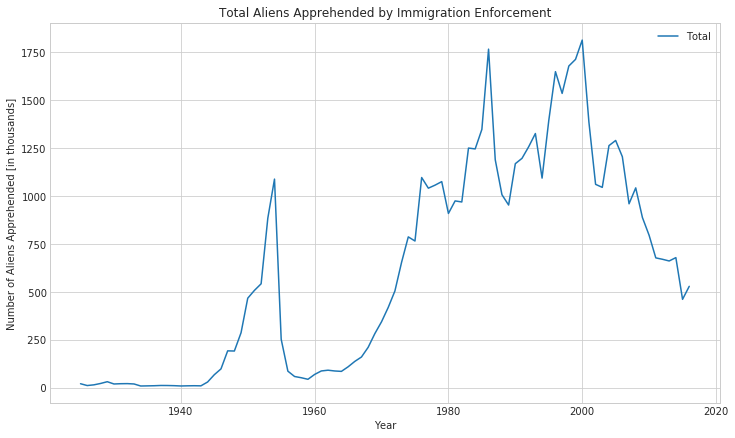

In [258]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, sharex=False, figsize=(12,7))
    df_full['aliens_apprehended'].plot(ax=ax)
    ax.set_xlabel('Year')
    ax.yaxis.set_major_formatter(y_formatter)
    ax.set_ylabel('Number of Aliens Apprehended [in thousands]')
    ax.set_title('Total Aliens Apprehended by Immigration Enforcement')

In [155]:
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
    Return object with labels on given axis omitted where alternately any
    or all of the data are missing
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, or tuple/list thereof
        Pass tuple or list to drop on multiple axes
    how : {'any', 'all'}
        * any : if any NA values are present, drop that label
        * all : if all values are NA, drop that label
    thresh : int, default None
        int value : require that many non-NA values
    subset : array-like
        Labels along other axis to consider, e.g. if you are dropping rows
        these would be a list of columns to include
    inplace : boolean, default False
        If True, do operation inplace and return None.
    
    Returns
    -------
    dropped : DataFrame
    
    Examples
    --------
    >>> df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.